```{include} ../math-definitions.md
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Removiendo una tendencia

## Distinguiendo una serie DS de una TS

- Comparemos la media y la varianza de estas dos series:

|                |    TS             |    DS                   |
| :------------- | :---------------- | :---------------------- |
| Proceso        | $x_t = x_0 + at + \epsilon_t$  |  $y_t = y_0 + at + \sum_{\tau=1}^{t}\epsilon_{\tau}$  |
| Media          | $x_0 + at$           | $y_0 + at$                  |
| Varianza       | $\sigma^2$               | $t\sigma^2$                      |
| $\Delta$             | $a + \epsilon_{t} - \epsilon_{t-1}$      |& $ a + \epsilon_t$                   |
| $-(\hat{z}_0 + \hat{a}t)$     |  $\epsilon_t$              | $\sum_{\tau=1}^{t}\epsilon_{\tau}$                   |


Los dos modelos tiene una media que crece linealmente, por lo que es muy difícil distinguirlos.


{{ empieza_ejemplo }} Serie TS vs caminata aleatoria con deriva {{ fin_titulo_ejemplo }}
Este código simula una realización de serie estacionaria alrededor de tendencia (TS) y una estacionaria en diferencia (DS).
\begin{align*}
x_t &= x_0 + at + \epsilon_t \tag{TS} \\
y_t &= y_0 + at + \sum_{\tau=1}^t\epsilon_\tau \tag{DS}
\end{align*}

Text(0.5, 1.05, 'Series no estacionarias')

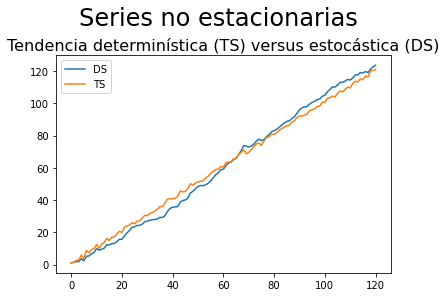

In [2]:
# Para que sea replicable, fijamos un valor para la función  `np.random.seed`.
np.random.seed(1)
T = 121
e = np.random.randn(T)
e[0] = 0

x0 = y0 = a = 1
t = np.arange(T)

y = y0 + a*t + e.cumsum()
x = x0 + a*t + e

fig, ax = plt.subplots()
pd.DataFrame({'DS': y, 'TS': x}).plot(ax=ax)
ax.set_title('Tendencia determinística (TS) versus estocástica (DS)', fontsize=16)
fig.suptitle('Series no estacionarias',fontsize=24, y=1.05)

{{ termina_ejemplo }}

Hemos visto que para transformar en estacionaria una serie...

- {bdg-primary}`TS` estimamos su tendencia determinística por regresión, usamos los residuos de esta regresión como el componente estacionario
- {bdg-primary}`DS` tomamos su primera diferencia.

Hecho esto, podemos modelar el componente estacionario, por ejemplo con ARMA.

Pero es importante usar la técnica adecuada para remover la tendencia, según sea el tipo de serie (TS o DS)

¿Qué pasaría si tomamos primera diferencia de una serie TS?, o ¿qué pasaría si removemos una tendencia determinística de una serie DS?



## Diferenciando una serie TS
{bdg-danger}`(buscando problemas -- parte 1)`

Para un proceso TS como $x_t = x_0 + at + \epsilon_t $, su primera diferencia es
\begin{align*}
\Delta x_t &= a + \epsilon_{t} - \epsilon_{t-1}\\
           &= a + (1-\Lag)\epsilon_{t}
\end{align*}

Es decir, la serie resultante $\Delta x_t$ es un proceso MA(1).

El polinomio de rezagos para la parte MA tiene una raíz unitaria, por lo que el proceso **no es invertible**.

Esto puede causar problemas a la hora de estimar el modelo.

Este problema también se presenta si diferenciamos una serie que ya es estacionaria: resultamos con un proceso no invertible y que tiene mayor varianza que el proceso original. A esto lo llamamos **sobrediferenciar**.



## Restando una tendencia determinística a una serie DS
{bdg-danger}`(buscando problemas -- parte 2)`

Para un proceso DS como $y_t = y_0 + at + \sum_{\tau=1}^t \epsilon_{\tau}$, remover la tendencia determinística resulta en
\begin{equation*}
\tilde{y}_t = 	\sum_{\tau=1}^t \epsilon_{\tau}
\end{equation*}

Es decir, la serie resultante $\tilde{y}_t$ aún conserva su tendencia estocástica.

Vemos que
\begin{align*}
\Delta\tilde{y}_t &= \epsilon \\
\tilde{y}_t &= \tilde{y}_{t-1} + \epsilon
\end{align*}

Esto es un proceso AR(1) con coeficiente autorregresivo igual a uno, por lo que no es estacionario.